## White Top-hat Transform Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This op performs a white [Top-hat Transform](https://en.wikipedia.org/wiki/Top-hat_transform) on any binary image. Let's see how the `Op` is called:

In [2]:
ij.op().help("topHat")

Available operations:
	(IterableInterval out?) =
	net.imagej.ops.morphology.topHat.ListTopHat(
		IterableInterval out?,
		RandomAccessibleInterval in1,
		List in2)

Note the parameters here:

* `IterableInterval out`: the output image
* `RandomAccessibleInterval in1`: the input image
* `List in2`: this parameter contains all of the [`Shape`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/Shape.html)s that the `Op` will use to Top-hat (i.e. for each `Shape` in `in2` close the input (or output of the last `topHat` if there are 2+ `Shape`s in `in2`)).

Let's get a grayscale image to try this out:

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


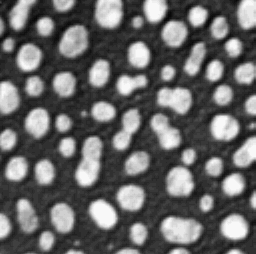

In [3]:
input_full = ij.scifio().datasetIO().open("http://imagej.net/images/blobs.gif")

//input_full has 3 channels. We only need one.
input = ij.op().run("hyperSliceView", input_full, 2, 0)

//invert the image so that the blobs are "on" and the background "off"
inverted = ij.op().run("create.img", input)
ij.op().run("invert", inverted, input)

ij.notebook().display(inverted)

Now that we have our image, let's apply our Top-hat. As the Wikipedia article states,

>The white top-hat transform returns an image, containing those "objects" or "elements" of an input image that:
>* Are "smaller" than the structuring element (i.e., places where the structuring element does not fit in), and
>* are brighter than their surroundings.

We can now apply the Top-hat. Let's use a radius of `10` for our Top-hat. This will allow us to capture most of the elements, but will also provide a range in intensity between the various sizes of objects:

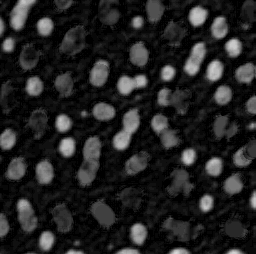

In [4]:
import net.imglib2.algorithm.neighborhood.HyperSphereShape

//create the shape that we are going to use in the Top-hat
shape = new HyperSphereShape(10)

output = ij.op().run("topHat", null, inverted, [shape])

ij.notebook().display(output)

To show the difference, let's [stack](../transform/stackView.ipynb) the images to see the difference:

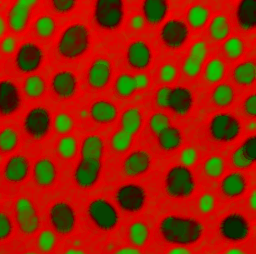

In [5]:
import net.imglib2.img.Img

list = new ArrayList<Img>()
 
list.add(input)
list.add(output)

stacked = ij.op().run("stackView", list)

ij.notebook().display(stacked)

As you can see the brighter objects in the (red) original image were found and the smaller the object (relative to the 10-pixel radius `HyperSphereShape`), the brighter it returned.